In [1]:
# !pip install phpserialize

In [2]:
import pandas as pd
import phpserialize
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from scipy.interpolate import make_interp_spline, BSpline
import numpy as  np
import re
%matplotlib inline

In [3]:
group = "W"

In [4]:
data = pd.read_csv("diff_delivery_region.csv",sep=";", header = None, names=['date','order','fact_delivery','site_delivery','1c_delivery','basket'])

In [5]:
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

In [6]:
c_delivery = data[data['1c_delivery'].notnull()]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51418 entries, 0 to 51417
Data columns (total 6 columns):
date             51418 non-null datetime64[ns]
order            51418 non-null int64
fact_delivery    51418 non-null float64
site_delivery    49299 non-null object
1c_delivery      4890 non-null object
basket           51418 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.4+ MB


In [8]:
data = data[pd.to_numeric(data['site_delivery'], errors='coerce').notnull()]
# data = data[pd.to_numeric(data['fact_delivery'], errors='coerce').notnull()]
c_delivery = c_delivery[pd.to_numeric(c_delivery['fact_delivery'], errors='coerce').notnull()]
c_delivery = c_delivery[pd.to_numeric(c_delivery['1c_delivery'], errors='coerce').notnull()]

In [9]:
data['site_delivery'] = data['site_delivery'].astype(float)

In [10]:
data['fact_delivery'] = data['fact_delivery'].astype(float)

In [14]:
c_delivery['fact_delivery'] = c_delivery['fact_delivery'].astype(float)
c_delivery['1c_delivery'] = c_delivery['1c_delivery'].astype(float)

In [15]:
c_delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 59 to 51410
Data columns (total 6 columns):
date             4888 non-null datetime64[ns]
order            4888 non-null int64
fact_delivery    4888 non-null float64
site_delivery    2825 non-null object
1c_delivery      4888 non-null float64
basket           4888 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 267.3+ KB


In [16]:
data['diff'] = data['site_delivery'] - data['fact_delivery']
c_delivery['diff'] = c_delivery['1c_delivery'] - c_delivery['fact_delivery']

In [17]:
data_group = data.drop(columns=['order'], axis=1).groupby(pd.Grouper(key='date', freq=group))

In [18]:
data_group_c = c_delivery.drop(columns=['order'], axis=1).groupby(pd.Grouper(key='date', freq=group))

In [19]:
result = data_group.mean()
result_c = data_group_c.mean()

In [20]:
result.head(5)

,fact_delivery,site_delivery,basket,diff
date,,,,
2016-06-05,634.269737,250.736842,129.254386,-383.532895
2016-06-12,624.500806,262.941667,0.000000,-361.559139
2016-06-19,645.462749,248.973262,49.441176,-396.489487
2016-06-26,648.954342,279.812500,0.000000,-369.141842
2016-07-03,689.315625,278.909091,9.062500,-410.406534


In [21]:
result_c.head(5)

,fact_delivery,1c_delivery,basket,diff
date,,,,
2016-06-05,700.490,0.0,0.0,-700.490
2016-06-12,882.000,0.0,0.0,-882.000
2016-06-19,642.895,119.5,0.0,-523.395
2016-06-26,583.930,300.0,0.0,-283.930
2016-07-03,639.365,148.0,0.0,-491.365


In [22]:
# xnew = np.linspace(result['cart_sum'].min(),result['cart_sum'].max(),300)

In [23]:
# spl = make_interp_spline(result['cart_sum'].values, result.index.values, k=5) #BSpline object

In [24]:
# power_smooth = spl(result.index.values)

<BarContainer object of 95 artists>

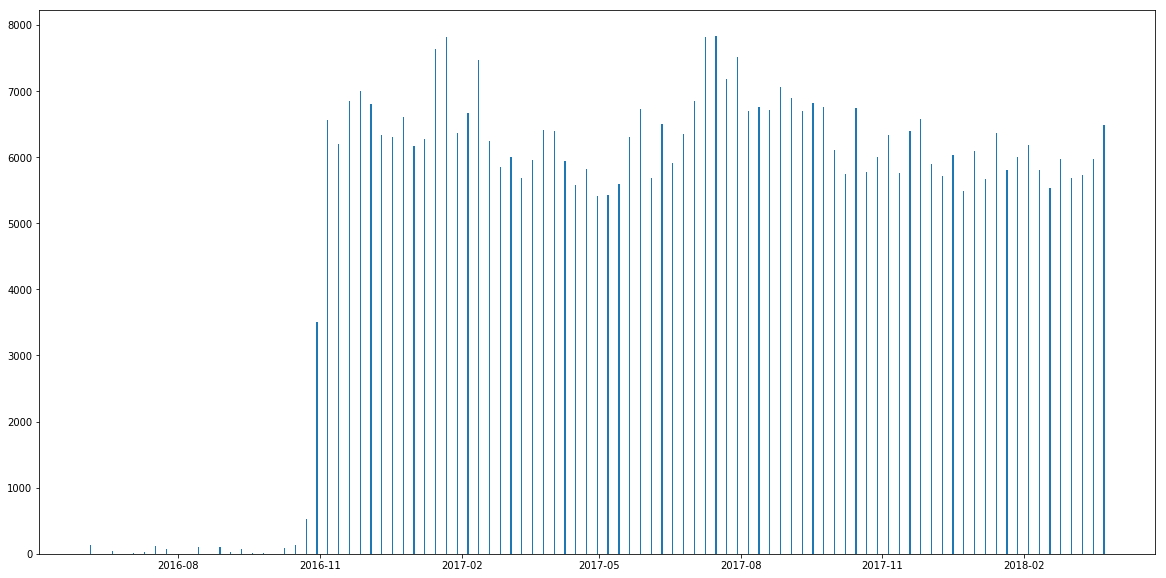

In [25]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.bar(result.index.values, result['basket'])

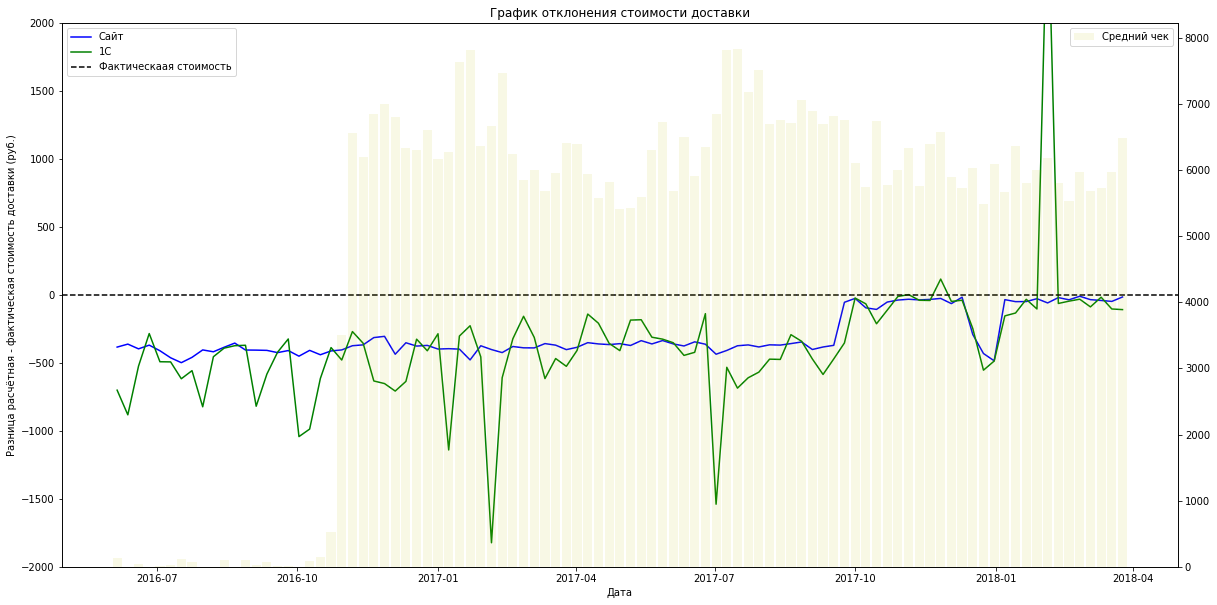

In [32]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title(u"График отклонения стоимости доставки")
ax2 = ax1.twinx()
ax1.set_ylim([-2000,2000])
ax1.set_xlabel(u"Дата")
ax1.set_ylabel(u"Разница расчётная - фактическая стоимость доставки (руб.)")
ax1.plot(result['diff'],"-b", label=u'Сайт')
ax1.plot(result_c['diff'],"-g", label=u'1С')
ax2.bar(result.index.values, result['basket'], color="y", width=6, alpha=0.1, label=u"Средний чек")
ax1.axhline(0, color='k', linestyle='--', label=u"Фактическаая стоимость")
# ax1.plot(new_date_median['item_cost'],"-g", label=u'Стоиомсть позиции', antialiased=True)
# ax1.plot(new_date_mean['item_cost'],"-k", label=u'Стоиомсть позиции среднее', antialiased=True)
# ax1.plot(result['non_reg'],linewidth=2)
ax2.legend(loc=1)
ax1.legend(loc=2)

In [27]:
# fig, ax1 = plt.subplots(figsize=(20,10))
# ax2 = ax1.twinx()
# ax2.plot(result['user']/result['count'],linestyle='solid',linewidth=4)
# ax2.set_ylim([0,1])
# ax2.legend([u'Динамика заказов зарегистрированных пользователей'])